Set GPU

In [6]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Found GPU at: /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17340610660505593863, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5020755424195792553
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15033535497632943290
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8344337323179697287
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

Prepair test data

In [7]:
from google.colab import drive

In [11]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
%cp 'drive/My Drive/FruitClassification/Test.zip' '/content/Test.zip'
!unzip Test.zip

Streaming output truncated to the last 5000 lines.
  inflating: Test/Mango/r_244_100.jpg  
  inflating: Test/Mango/r_245_100.jpg  
  inflating: Test/Mango/r_246_100.jpg  
  inflating: Test/Mango/r_247_100.jpg  
  inflating: Test/Mango/r_248_100.jpg  
  inflating: Test/Mango/r_249_100.jpg  
  inflating: Test/Mango/r_250_100.jpg  
  inflating: Test/Mango/r_251_100.jpg  
  inflating: Test/Mango/r_252_100.jpg  
  inflating: Test/Mango/r_253_100.jpg  
  inflating: Test/Mango/r_254_100.jpg  
  inflating: Test/Mango/r_255_100.jpg  
  inflating: Test/Mango/r_256_100.jpg  
  inflating: Test/Mango/r_257_100.jpg  
  inflating: Test/Mango/r_258_100.jpg  
  inflating: Test/Mango/r_259_100.jpg  
  inflating: Test/Mango/r_25_100.jpg  
  inflating: Test/Mango/r_260_100.jpg  
  inflating: Test/Mango/r_261_100.jpg  
  inflating: Test/Mango/r_262_100.jpg  
  inflating: Test/Mango/r_263_100.jpg  
  inflating: Test/Mango/r_264_100.jpg  
  inflating: Test/Mango/r_265_100.jpg  
  inflating: Test/Mango/r_266_

In [27]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import random

In [28]:
TEST_DIR = 'Test/'
CLASSES_TEST = os.listdir(TEST_DIR)
print('Numbers of classes:', len(CLASSES_TEST))
print(CLASSES_TEST)

Numbers of classes: 71
['Granadilla', 'Salak', 'Apple Red 2', 'Strawberry Wedge', 'Tangelo', 'Banana', 'Tamarillo', 'Apple Golden 1', 'Passion Fruit', 'Cantaloupe 2', 'Pitahaya Red', 'Physalis', 'Grape Pink', 'Mango', 'Papaya', 'Apple Red Yellow', 'Apple Granny Smith', 'Maracuja', 'Huckleberry', 'Apricot', 'Pomegranate', 'Kiwi', 'Grape White 2', 'Avocado ripe', 'Melon Piel de Sapo', 'Carambula', 'Apple Red Delicious', 'Apple Golden 3', 'Mulberry', 'Apple Braeburn', 'Banana Red', 'Grapefruit Pink', 'Lychee', 'Cherry Rainier', 'Limes', 'Raspberry', 'Strawberry', 'Cantaloupe 1', 'Pear', 'Lemon Meyer', 'Pear Abate', 'Nectarine', 'Apple Golden 2', 'Dates', 'Pear Williams', 'Rambutan', 'Pineapple Mini', 'Physalis with Husk', 'Mandarine', 'Kaki', 'Apple Red 3', 'Avocado', 'Cocos', 'Pineapple', 'Cactus fruit', 'Pepino', 'Cherry 1', 'Quince', 'Lemon', 'Peach Flat', 'Orange', 'Cherry 2', 'Grape White', 'Apple Red 1', 'Kumquats', 'Grapefruit White', 'Clementine', 'Guava', 'Pear Monster', 'Plum', 

In [29]:
IMG_SIZE=64
def create_test_data():
    test_data = []
    class_num = 0

    for category in CLASSES_TEST:
      path = os.path.join(TEST_DIR, category)
      
      for img in tqdm(os.listdir(path)):
        try:
          img_array = cv2.imread(os.path.join(path, img))
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Resize to 64x64x3
          test_data.append([new_array, class_num])
        except Exception as e:
          pass
      class_num += 1

    return test_data

In [30]:
test_data = create_test_data()

100%|██████████| 164/164 [00:00<00:00, 4039.62it/s]


In [31]:
random.shuffle(test_data)

X_test = []
y_test = []

for features, label in test_data:
  X_test.append(features)
  y_test.append(label)


X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test = X_test/255.0

y_test = np.array(y_test)

In [33]:
%cd drive/My\ Drive/FruitClassification

/content/drive/My Drive/FruitClassification


In [34]:
from tensorflow.keras.models import load_model

trained_model = load_model('fruit_classification.h5')

In [35]:
predicted_classes = trained_model.predict_classes(X_test)
tmp = np.sum(predicted_classes==y_test)
print('True labels/Total labels =', tmp/len(y_test))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
True labels/Total labels = 0.9529578877005348


/content
File name: Test/Strawberry/97_100.jpg
Predicted label:  Strawberry


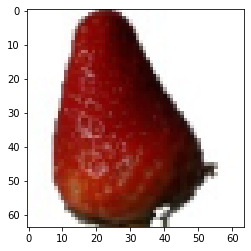

In [48]:
%cd '/content/'

%matplotlib inline
import matplotlib.pyplot as plt

subdir = 'Test/' + random.choice(os.listdir('Test/')) +'/'
img_test_name = subdir + random.choice(os.listdir(subdir))
print('File name:',img_test_name)

img_test = cv2.imread(img_test_name)
img_test = cv2.resize(img_test, (IMG_SIZE, IMG_SIZE))

img_test_array = np.array(img_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predicted_class = np.argmax(trained_model.predict(img_test_array))
print('Predicted label: ', CLASSES_TEST[predicted_class])

img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_test)